In [1]:
from spacerocks.spice import SpiceKernel
from spacerocks import SpaceRock
from spacerocks.time import Time

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Manually instantiate a SpiceKernel object, and load relevant spice kernels located on your local machine 
kernel = SpiceKernel()
kernel.load("/Users/thomasruch/Gerdes/leap_seconds.tls")
kernel.load("/Users/thomasruch/Gerdes/de440s.bsp")

Loading kernel: /Users/thomasruch/Gerdes/leap_seconds.tls
Loading kernel: /Users/thomasruch/Gerdes/de440s.bsp


In [3]:
kernel

SpiceKernel:
  - /Users/thomasruch/Gerdes/leap_seconds.tls
  - /Users/thomasruch/Gerdes/de440s.bsp

In [4]:
# Alternatively, use configuration file to download + load kernels

# Config file has default kernels needed for running most relevant operation in SpaceRocks, an auto_download flag, a path to check for kernels and a path to download kernels to
# If download_dir is not specified in the config, it saves to ~/.spacerocks/spice
kernel1 = SpiceKernel(config="/Users/thomasruch/srnew1/spacerocks/config.toml")

Loading configuration from /Users/thomasruch/srnew1/spacerocks/config.toml

Configuration loaded:
  Kernel paths: ["/Users/thomasruch/Gerdes", "/Users/thomasruch/.spacerocks/spice/"]
  Download directory: "/Users/thomasruch/.spacerocks/spice"
  Auto-download: true

Processing kernel: latest_leapseconds.tls
➜ Kernel not found locally, downloading...
    Saving to /Users/thomasruch/.spacerocks/spice/latest_leapseconds.tls
    Download complete
Loading kernel: /Users/thomasruch/.spacerocks/spice/latest_leapseconds.tls

Processing kernel: de440s.bsp
✓ Found existing kernel at: /Users/thomasruch/Gerdes/de440s.bsp
Loading kernel: /Users/thomasruch/Gerdes/de440s.bsp

Processing kernel: earth_1962_240827_2124_combined.bpc
✓ Found existing kernel at: /Users/thomasruch/Gerdes/earth_1962_240827_2124_combined.bpc
Loading kernel: /Users/thomasruch/Gerdes/earth_1962_240827_2124_combined.bpc


In [5]:
kernel1

SpiceKernel:
  - /Users/thomasruch/.spacerocks/spice/latest_leapseconds.tls
  - /Users/thomasruch/Gerdes/de440s.bsp
  - /Users/thomasruch/Gerdes/earth_1962_240827_2124_combined.bpc

In [6]:
kernel1.loaded_kernels

['/Users/thomasruch/.spacerocks/spice/latest_leapseconds.tls',
 '/Users/thomasruch/Gerdes/de440s.bsp',
 '/Users/thomasruch/Gerdes/earth_1962_240827_2124_combined.bpc']

In [7]:
t0 = Time.now()

In [8]:
planets_names = ["sun", 
                 "mercury barycenter", 
                 "venus barycenter", 
                 "earth", 
                 "mars barycenter", 
                 "jupiter barycenter", 
                 "saturn barycenter", 
                 "uranus barycenter", 
                 "neptune barycenter"]

In [9]:
planets = {name: SpaceRock.from_spice(name, t0) for name in planets_names}
planet_positions = {planet: [] for planet in planets}

In [10]:
kernel.unload()

Unloading all kernels


In [11]:
epochs = np.linspace(t0.epoch, t0.epoch + 365.25 * 300, 10_000, endpoint=True)
for epoch in epochs:

    t = Time(epoch, timescale='utc', format='jd')

    for name, planet in planets.items():
        planet.analytic_propagate(t)
        x, y, z = planet.position
        planet_positions[name].append([x, y, z])

AttributeError: 'builtins.SpaceRock' object has no attribute 'analytic_propagate'

ValueError: not enough values to unpack (expected 3, got 0)

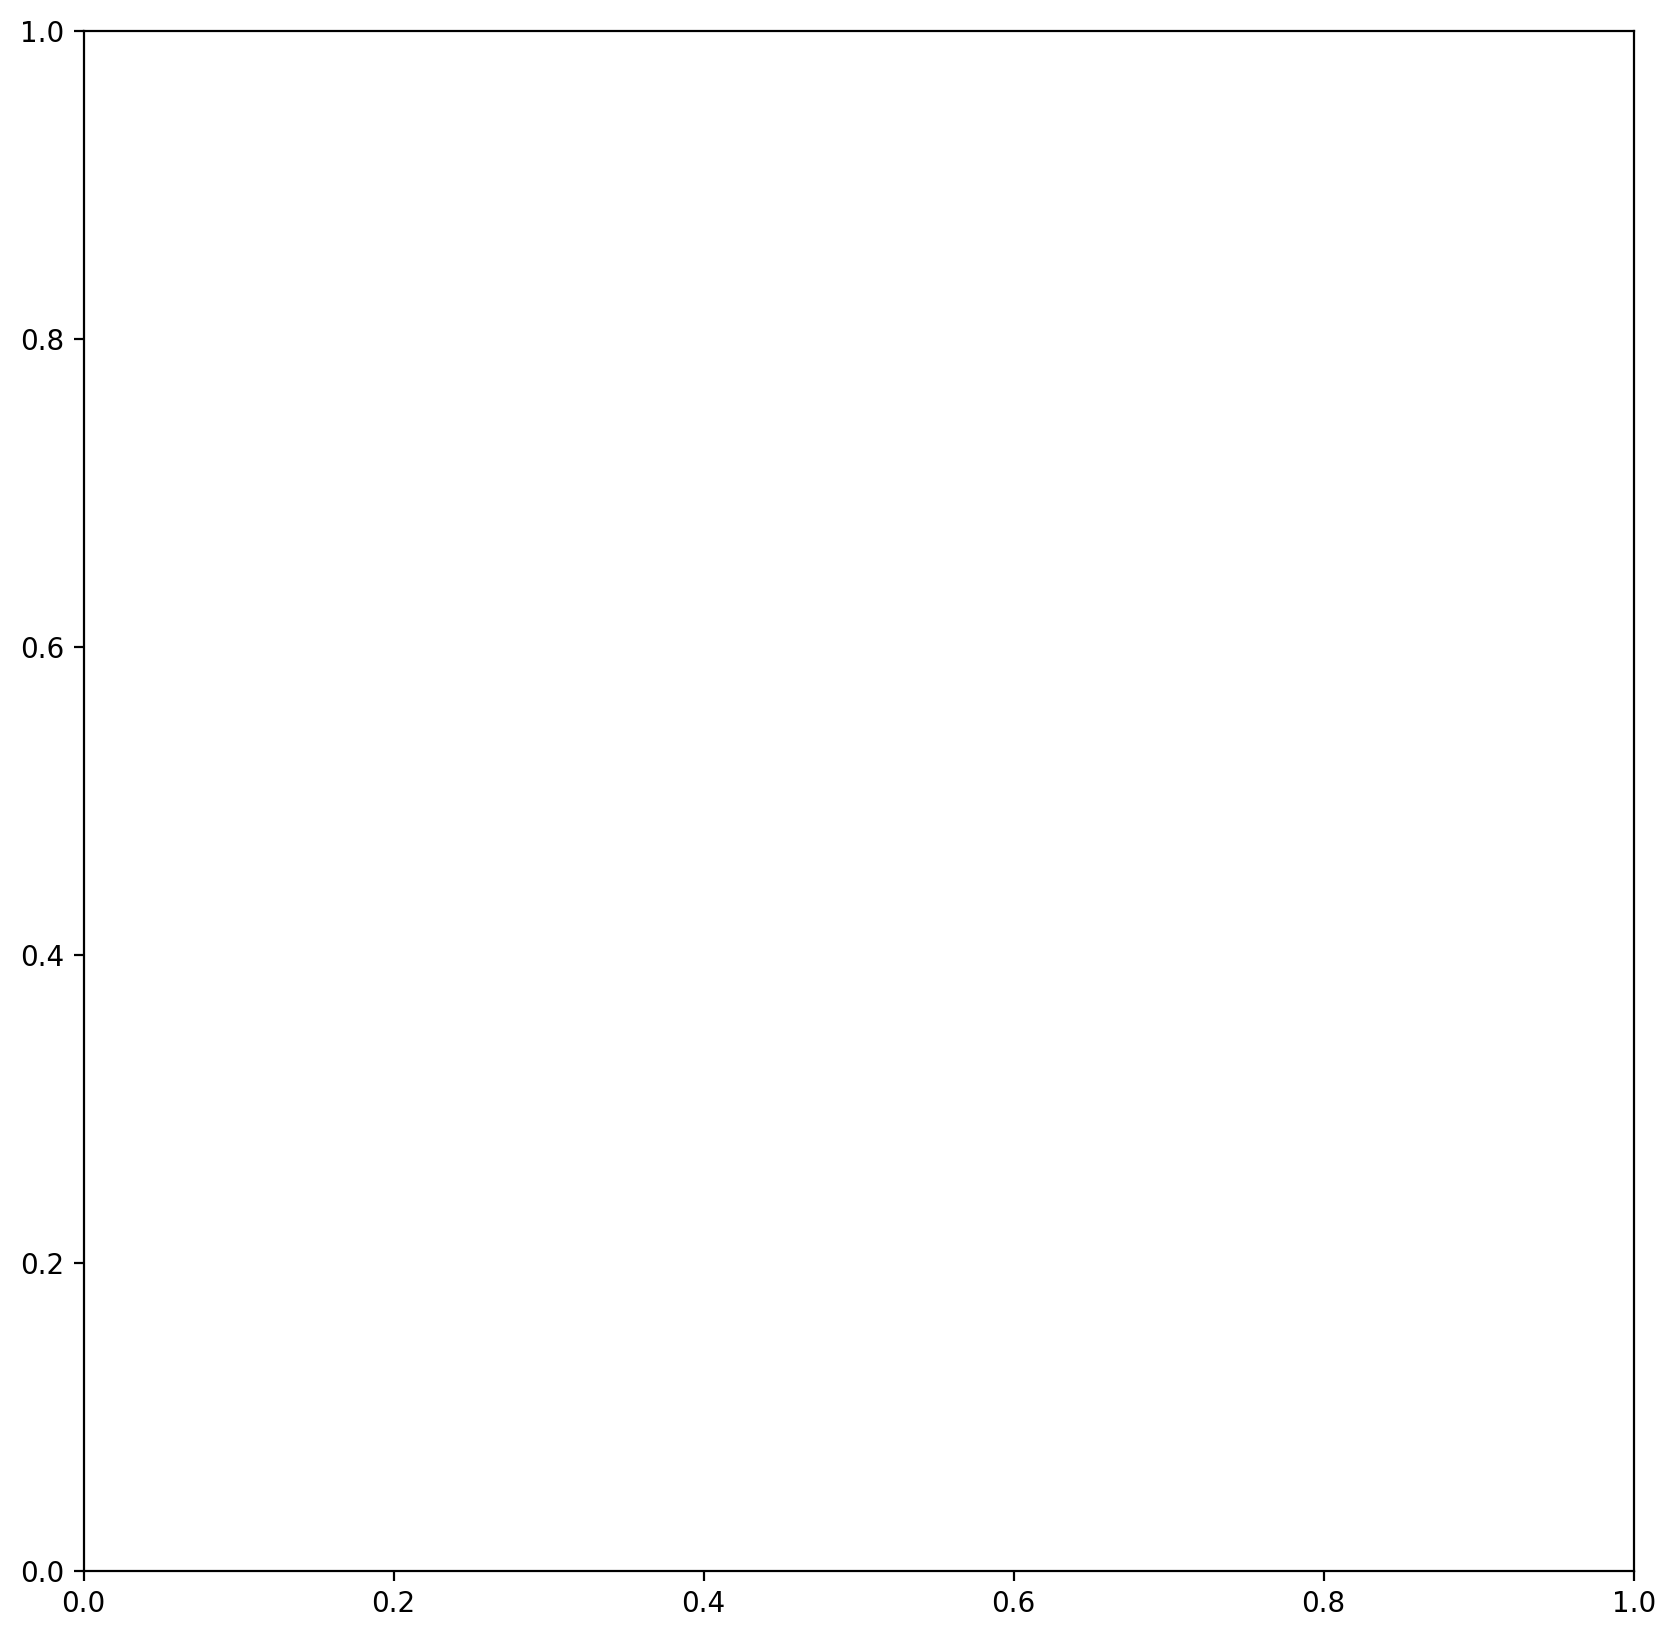

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for name, positions in planet_positions.items():
    x, y, z = np.array(positions).T
    ax.plot(x, y, label=name, lw=1)

ax.set_xlabel("x (au)", fontsize=16, labelpad=20)
ax.set_ylabel("y (au)", fontsize=16, labelpad=20)